<a href="https://colab.research.google.com/github/AlgoRex2/graymatter-ml/blob/main/california_housing_eda_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

California Housing Prices datase

Dataset Overview 🏡
This dataset contains information about median house values for California districts based on data from the 1990 U.S. Census. The goal is to build a model to predict the median house price for a given district. This makes it a classic regression problem, which is perfect for demonstrating predictive analysis.
Key Features (Variables):
•	longitude: A measure of how far west a house is (-124.3 to -114.3). A higher value is more west.
•	latitude: A measure of how far north a house is (32.5 to 42.0). A higher value is more north.
•	housing_median_age: Median age of a house in the district. Lower is newer.
•	total_rooms: Total number of rooms in all houses in the district.
•	total_bedrooms: Total number of bedrooms in all houses in the district.
•	population: Total population of the district.
•	households: Total number of households (groups of people living together) in the district.
•	median_income: Median income for households in the district, measured in tens of thousands of dollars.
•	median_house_value: This is the target variable we will be predicting, the median house value for households in thousands of dollars ($).


In [4]:
# Cell 1: Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# California Housing Prices datase

print (" California Housing Prices datase")

Mounted at /content/gdrive
 California Housing Prices datase


In [5]:
# Cell 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Cell 3: Load the Dataset
try:
    df = pd.read_csv('/content/gdrive/MyDrive/DA_Practise_Folder_EXCEL/Calif_House_DS.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file was not found. Please check the path and filename.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!


In [7]:
# Cell 4: Basic EDA
print("--- First 5 rows of the dataset ---")
print(df.head())

print("\n--- Dataset information ---")
df.info()

print("\n--- Descriptive statistics ---")
print(df.describe())

--- First 5 rows of the dataset ---
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  

--- Dataset information ---
<class 'pa

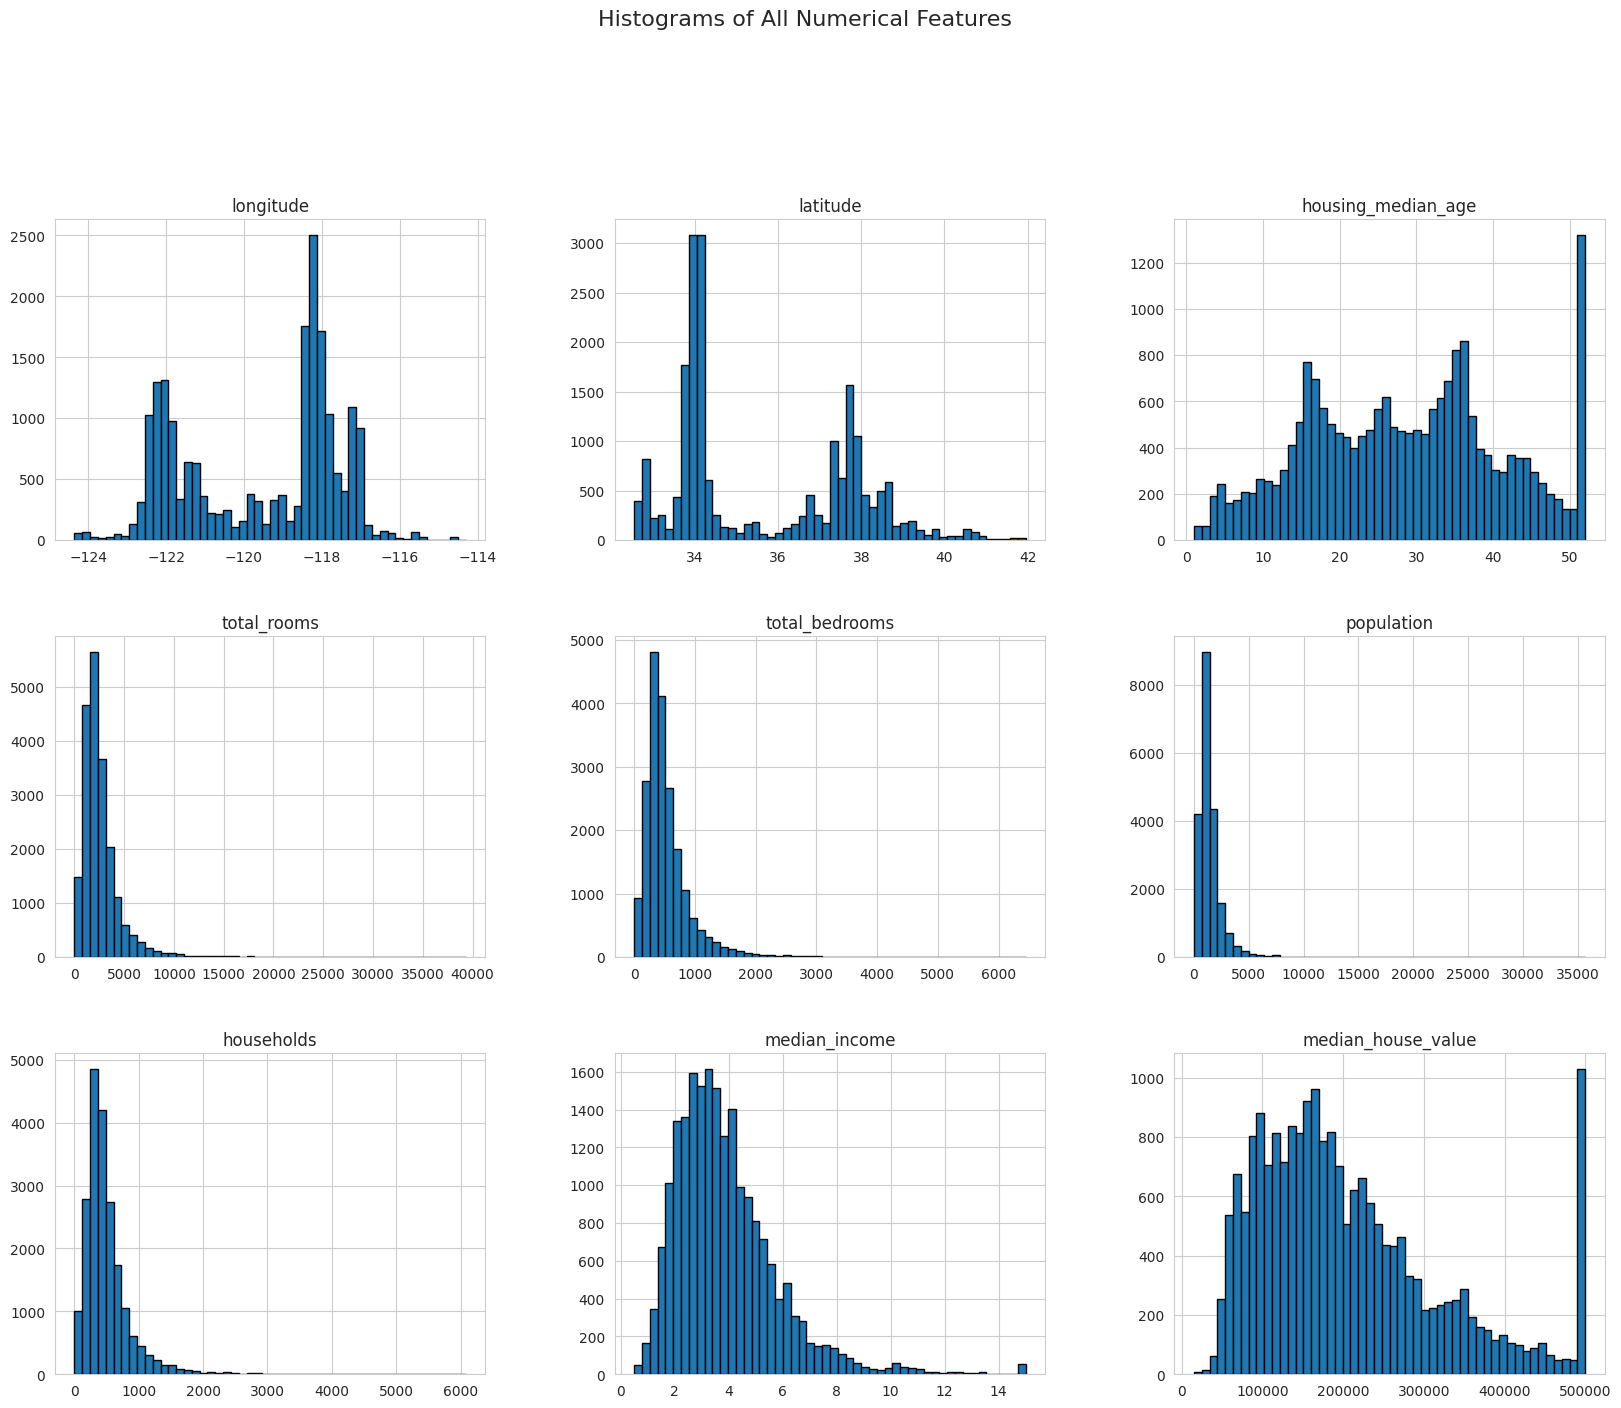

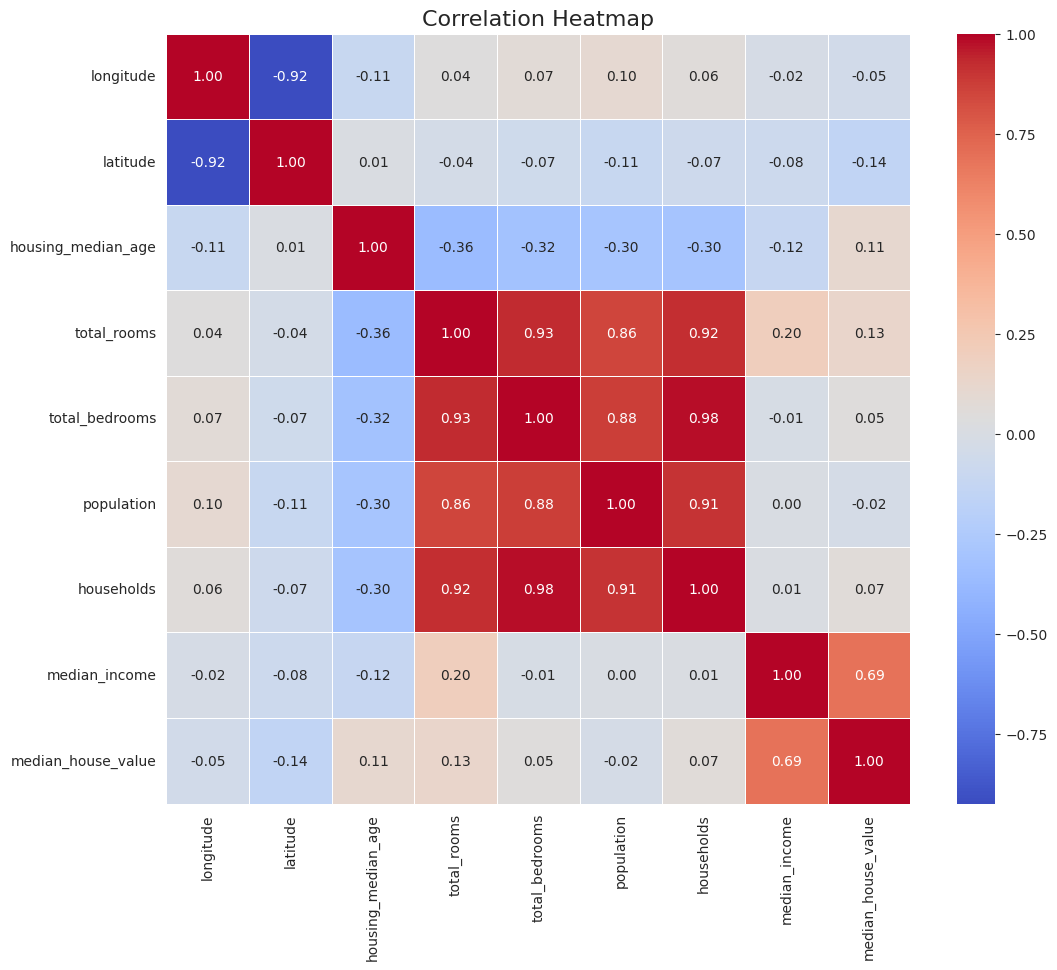

In [9]:
# Cell 5: Data Visualization
# Set up a style for the plots
sns.set_style("whitegrid")

# Create histograms for all numerical features
# Dropping the 'ocean_proximity' column for visualization
df.drop('ocean_proximity', axis=1).hist(bins=50, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of All Numerical Features', y=1.02, fontsize=16)
plt.show()

# Create a heatmap to visualize the correlation matrix
# Drop the non-numeric 'ocean_proximity' column before calculating correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [11]:
# Cell 6: Data Preparation
# Drop the target variable for a cleaner separation of features
features = df.drop('median_house_value', axis=1)
target = df['median_house_value']

# Identify numerical and categorical columns
numerical_cols = features.select_dtypes(include=np.number).columns
categorical_cols = features.select_dtypes(include='object').columns

# Handle missing values for numerical columns using the median
df_clean = features.copy()
df_clean[numerical_cols] = df_clean[numerical_cols].fillna(df_clean[numerical_cols].median())

# Handle missing values for categorical columns using the mode
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# Now, apply one-hot encoding to the categorical column
# This converts the text categories into numerical columns (e.g., 'NEAR BAY' becomes a 1 or 0)
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Reassign X and y with the cleaned, encoded data
X = df_clean
y = target

print("Data prepared for model training.")
print("\nCleaned and Encoded DataFrame Info:")
print(X.info())

Data prepared for model training.

Cleaned and Encoded DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  int64  
 3   total_rooms                 20640 non-null  int64  
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  int64  
 6   households                  20640 non-null  int64  
 7   median_income               20640 non-null  float64
 8   ocean_proximity_INLAND      20640 non-null  bool   
 9   ocean_proximity_ISLAND      20640 non-null  bool   
 10  ocean_proximity_NEAR BAY    20640 non-null  bool   
 11  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float

In [12]:
# Cell 7: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (16512, 12)
Testing data shape: (4128, 12)


In [13]:
# Cell 8: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


Mean Squared Error (MSE): 4908476721.16
Root Mean Squared Error (RMSE): 70060.52
R-squared (R2): 0.63


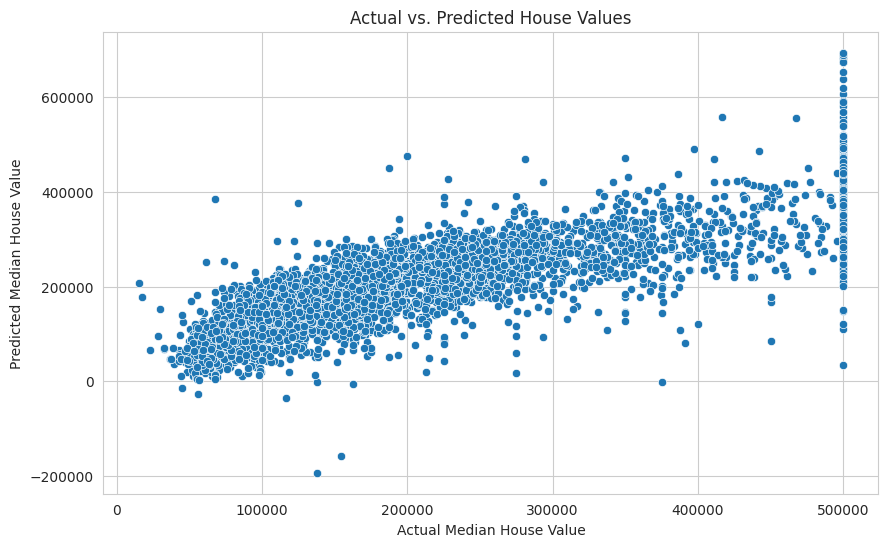

In [14]:
# Cell 9: Evaluate the Model
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optionally, you can visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted House Values")
plt.show()

In [15]:
# Cell 10: Advanced Model - Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [16]:
# Cell 11: Evaluate the Advanced Model
forest_pred = forest_model.predict(X_test)

# Calculate performance metrics for the Random Forest model
forest_mse = mean_squared_error(y_test, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = r2_score(y_test, forest_pred)

print("--- Random Forest Regressor Performance ---")
print(f"Mean Squared Error (MSE): {forest_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {forest_rmse:.2f}")
print(f"R-squared (R2): {forest_r2:.2f}")

# Compare with the Linear Regression model
print("\n--- Comparison with Linear Regression ---")
print(f"Linear Regression R2: {r2:.2f}")
print(f"Random Forest R2: {forest_r2:.2f}")

--- Random Forest Regressor Performance ---
Mean Squared Error (MSE): 2404745975.12
Root Mean Squared Error (RMSE): 49038.21
R-squared (R2): 0.82

--- Comparison with Linear Regression ---
Linear Regression R2: 0.63
Random Forest R2: 0.82


--- Top 10 Most Important Features ---
                            importance
median_income                 0.490717
ocean_proximity_INLAND        0.140933
longitude                     0.106093
latitude                      0.101897
housing_median_age            0.052065
population                    0.032511
total_bedrooms                0.023960
total_rooms                   0.023412
households                    0.018376
ocean_proximity_NEAR OCEAN    0.008793


/tmp/ipython-input-4273146540.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['importance'].head(10), y=feature_importances.index[:10], palette='viridis')


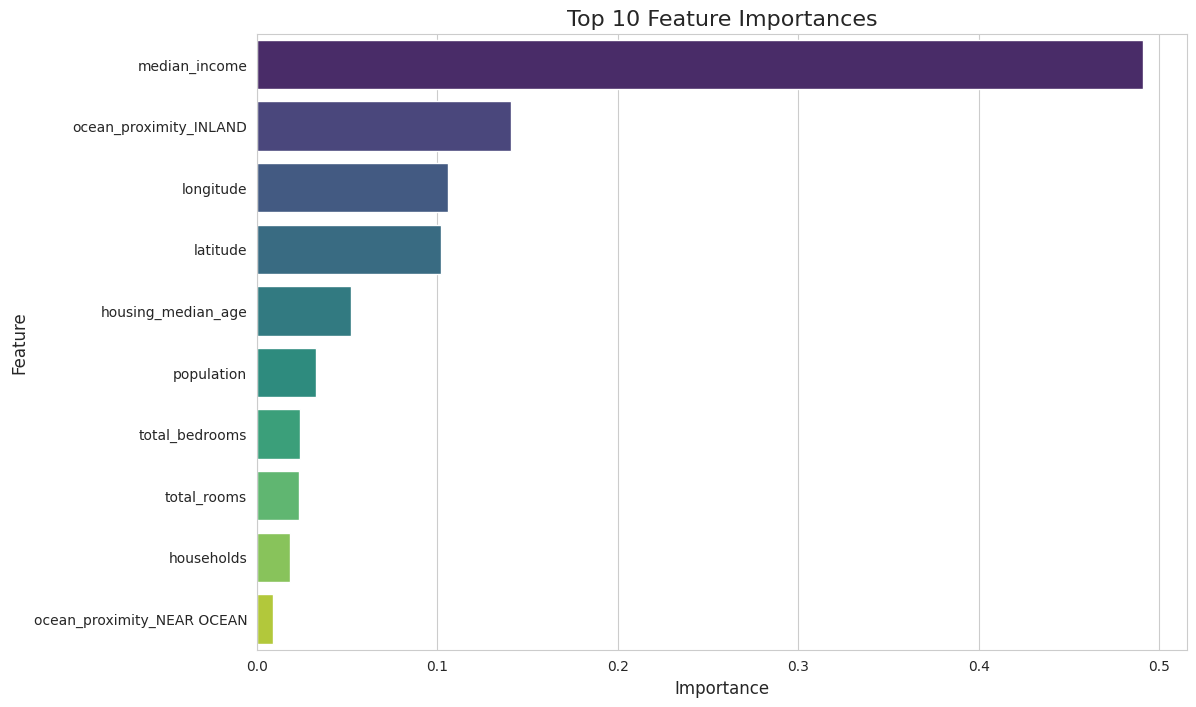

In [17]:
# Cell 12: Feature Importance Analysis
feature_importances = pd.DataFrame(forest_model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display the top 10 most important features
print("--- Top 10 Most Important Features ---")
print(feature_importances.head(10))

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances['importance'].head(10), y=feature_importances.index[:10], palette='viridis')
plt.title('Top 10 Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

In [18]:
# Cell 13: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_features': [6, 8],     # Number of features to consider at each split
    'max_depth': [10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5] # Minimum number of samples required to split a node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found by GridSearchCV:
{'max_depth': 20, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 200}


In [19]:
# Cell 14: Evaluate the Tuned Model
tuned_pred = best_model.predict(X_test)

# Calculate metrics for the best tuned model
tuned_mse = mean_squared_error(y_test, tuned_pred)
tuned_rmse = np.sqrt(tuned_mse)
tuned_r2 = r2_score(y_test, tuned_pred)

print("--- Tuned Random Forest Regressor Performance ---")
print(f"Mean Squared Error (MSE): {tuned_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {tuned_rmse:.2f}")
print(f"R-squared (R2): {tuned_r2:.2f}")

# Compare performance
print("\n--- Performance Comparison ---")
print(f"Untuned Random Forest R2: {forest_r2:.2f}")
print(f"Tuned Random Forest R2: {tuned_r2:.2f}")

--- Tuned Random Forest Regressor Performance ---
Mean Squared Error (MSE): 2342443650.68
Root Mean Squared Error (RMSE): 48398.80
R-squared (R2): 0.82

--- Performance Comparison ---
Untuned Random Forest R2: 0.82
Tuned Random Forest R2: 0.82


SUMMARY OF THE PROJECT - 27 AUGUST 2020

1. Data Access & Initial Setup
Started by addressing the primary challenge of using a local file in a cloud environment.

Mounted Google Drive to connect personal storage to the Colab notebook.

Imported essential libraries like Pandas, NumPy, and Scikit-learn to handle data, calculations, and modeling.

Loaded the dataset from Google Drive into a Pandas DataFrame.

2. Exploratory Data Analysis (EDA)
Next, explored the dataset to understand its characteristics, uncover insights, and identify potential problems.

Used df.info() and df.describe() to get a quick overview of the data types, non-null values, and basic statistics.

Created histograms to visualize the distribution of each numerical feature.

Generated a correlation heatmap to understand the relationships between the numerical variables, which also helped to identify and fix the issue with the ocean_proximity categorical column.

3. Data Preprocessing & Modeling (V1)
Before building the first model, prepared the data to ensure it was in a format that a machine learning algorithm could understand.

Handled missing values by filling them with the median for numerical columns and the mode for the categorical column.

Used one-hot encoding (pd.get_dummies) to convert the ocean_proximity text categories into numerical columns.

Split the data into training and testing sets to ensure the model could be evaluated on unseen data.

Trained a basic Linear Regression model as a starting point.

4. Advanced Modeling & Evaluation (V2)
To improve the predictions, we moved on to a more sophisticated model and performed in-depth analysis.

Trained a more powerful Random Forest Regressor model, which is often better at handling complex, non-linear relationships in data.

Evaluated this model's performance and compared its R-squared score to that of the Linear Regression model to confirm it was a significant improvement.

Used the Random Forest model to perform a feature importance analysis, which revealed that the features were the most influential in predicting house prices. This gave the valuable domain insights.

5. Model Optimization
Finally,  focused on squeezing out the last bit of performance from our best model.

Performed Hyperparameter tuning using GridSearchCV. This process systematically tested different combinations of parameters for our Random Forest model to find the optimal configuration.

Evaluated the tuned model's performance to see if the efforts resulted in a better, more robust model.

Successfully completed the major phases of a full-fledged data science project: From data ingestion and Cleaning to Advanced Modeling and Fine-Tuning.

In [20]:
# Cell 15: Feature Engineering
df_fe = df.copy()

# 1. Create 'rooms_per_household'
# Total rooms divided by the number of households
df_fe['rooms_per_household'] = df_fe['total_rooms'] / df_fe['households']

# 2. Create 'bedrooms_per_room'
# Total bedrooms divided by the total rooms
df_fe['bedrooms_per_room'] = df_fe['total_bedrooms'] / df_fe['total_rooms']

# 3. Create 'population_per_household'
# Population divided by the number of households
df_fe['population_per_household'] = df_fe['population'] / df_fe['households']

print("New features created successfully!")
print("\nDataFrame with new features:")
print(df_fe.head())

New features created successfully!

DataFrame with new features:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0         322         126         8.3252              452600        NEAR BAY   
1        2401        1138         8.3014              358500        NEAR BAY   
2         496         177         7.2574              352100        NEAR BAY   
3         558         219         5.6431              341300        NEAR BAY   
4         565         259         3.8462              342200        NEAR BAY   

   

In [21]:
# Cell 16: Data Preparation, Splitting, and Re-training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Re-identify numerical and categorical columns from the new DataFrame
# The new features ('rooms_per_household', 'bedrooms_per_room', 'population_per_household') are numerical
numerical_cols_fe = df_fe.select_dtypes(include=np.number).columns
categorical_cols_fe = df_fe.select_dtypes(include='object').columns

# Handle missing values for numerical columns (in case new features have NaNs)
df_clean_fe = df_fe.copy()
df_clean_fe[numerical_cols_fe] = df_clean_fe[numerical_cols_fe].fillna(df_clean_fe[numerical_cols_fe].median())

# Handle missing values for categorical columns using the mode
for col in categorical_cols_fe:
    df_clean_fe[col] = df_clean_fe[col].fillna(df_clean_fe[col].mode()[0])

# Now, apply one-hot encoding to the categorical column again
df_clean_fe = pd.get_dummies(df_clean_fe, columns=categorical_cols_fe, drop_first=True)

# Separate features (X_new) and target variable (y)
X_new = df_clean_fe.drop('median_house_value', axis=1)
y = df_clean_fe['median_house_value']

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train the best model from our previous tuning (Random Forest Regressor)
# We will use the best parameters found by GridSearchCV in Cell 13
# Best parameters: {'max_depth': 20, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 200}
best_model = RandomForestRegressor(max_depth=20, max_features=8, min_samples_split=2, n_estimators=200, random_state=42)
best_model.fit(X_train_new, y_train_new)

print("Model re-trained with new features!")

Model re-trained with new features!


In [22]:
# Cell 17: Evaluate the New Model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set with the new features
final_pred = best_model.predict(X_test_new)

# Calculate performance metrics for the model with engineered features
final_mse = mean_squared_error(y_test_new, final_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test_new, final_pred)

print("--- Model Performance with Engineered Features ---")
print(f"Mean Squared Error (MSE): {final_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {final_rmse:.2f}")
print(f"R-squared (R2): {final_r2:.2f}")

# Compare with the previous R-squared score (from Cell 14)
print("\n--- Performance Comparison ---")
print(f"Previous R2 (without FE): 0.82")
print(f"Final R2 (with FE): {final_r2:.2f}")

--- Model Performance with Engineered Features ---
Mean Squared Error (MSE): 2357776266.67
Root Mean Squared Error (RMSE): 48556.94
R-squared (R2): 0.82

--- Performance Comparison ---
Previous R2 (without FE): 0.82
Final R2 (with FE): 0.82


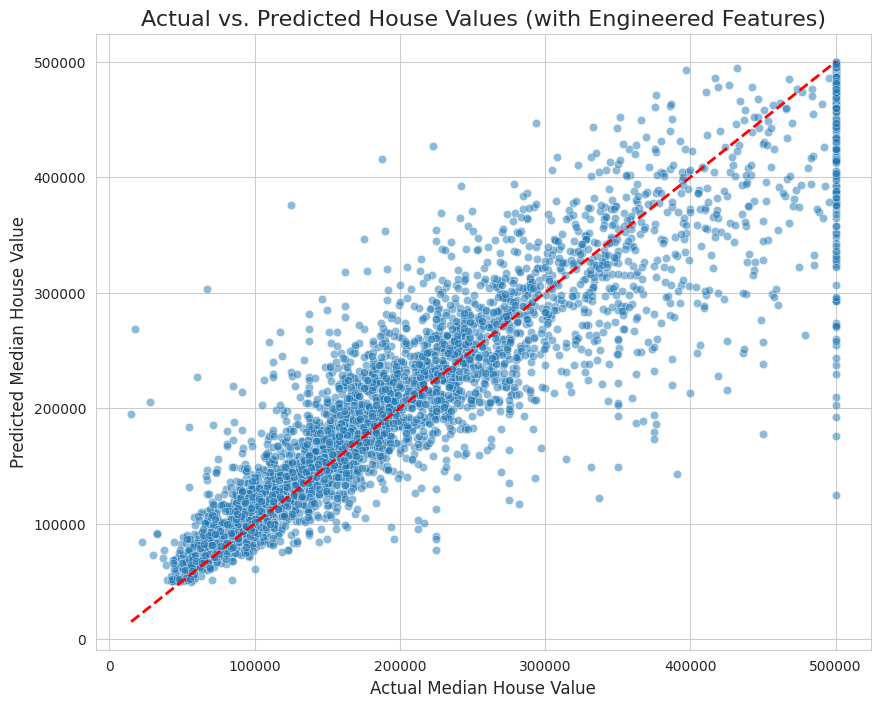

In [23]:
# Cell 18: Visualize Final Model Performance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test_new, y=final_pred, alpha=0.5)

# Plot a perfect prediction line (y=x) for comparison
sns.lineplot(x=[y_test_new.min(), y_test_new.max()],
             y=[y_test_new.min(), y_test_new.max()],
             color='red', linestyle='--', linewidth=2)

plt.title('Actual vs. Predicted House Values (with Engineered Features)', fontsize=16)
plt.xlabel('Actual Median House Value', fontsize=12)
plt.ylabel('Predicted Median House Value', fontsize=12)
plt.show()

In [24]:
# Cell 19: Save the Best Model
import joblib

# Define the filename for the saved model
model_filename = 'california_housing_final_model.pkl'

# Save the trained model to the specified file
joblib.dump(best_model, model_filename)

print(f"Final model saved to '{model_filename}' successfully!")
print("You can download this file from your Colab environment or Google Drive.")

Final model saved to 'california_housing_final_model.pkl' successfully!
You can download this file from your Colab environment or Google Drive.


In [25]:
# Cell 20: Load the Saved Model and Make a Single Prediction
# Let's create a new, hypothetical data point
# This data must have the same format and features as your training data, including the one-hot encoded 'ocean_proximity'
# You will need to manually set the values based on your training data's columns (check X_new.columns)

# Example hypothetical data (you can change these values)
new_data = pd.DataFrame([[
    -122.25, # longitude
    37.88,   # latitude
    41.0,    # housing_median_age
    880.0,   # total_rooms
    129.0,   # total_bedrooms
    322.0,   # population
    126.0,   # households
    8.3252,  # median_income
    1.0,     # rooms_per_household (new engineered feature)
    0.1465,  # bedrooms_per_room (new engineered feature)
    2.5555,  # population_per_household (new engineered feature)
    1.0,     # ocean_proximity_<1H OCEAN> (one-hot encoded)
    0.0,     # ocean_proximity_INLAND
    0.0,     # ocean_proximity_ISLAND
    0.0      # ocean_proximity_NEAR BAY
]], columns=X_new.columns)

# Load the saved model
loaded_model = joblib.load(model_filename)

# Make the prediction
predicted_price = loaded_model.predict(new_data)

print(f"The predicted median house value for the new data point is: ${predicted_price[0]:.2f}")

The predicted median house value for the new data point is: $345480.59
